# Cluster product categories (Unsupervised learning)

/var/folders/zf/m3g54d9d25q0jn4s7wbccll00000gn/T/ipykernel_28757/1299329956.py:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, usecols=lambda col: col in ["asins", "name", "categories", "reviews.rating", "reviews.text", "reviews.title", "imageURLs"])


,name,asins,categories,imageURLs,rating,text,title
0,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,3.0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,4.0,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,5.0,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,5.0,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,5.0,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...


name          6028
asins            2
categories       0
imageURLs        0
rating          33
text             1
title           17
dtype: int64
[3. 4. 5. 1. 2.]


,name,asins,categories,imageURLs,rating,text,title,title_text,combined_text,categories_encoded
0,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,3.0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,... 3 of them and one of the item is bad quali...,... 3 of them and one of the item is bad quali...,1
1,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,4.0,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,... always the less expensive way to go for pr...,... always the less expensive way to go for pr...,1
2,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,5.0,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,... are not Duracell but for the price i am ha...,... are not Duracell but for the price i am ha...,1
3,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,5.0,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,... as well as name brand batteries at a much ...,... as well as name brand batteries at a much ...,1
4,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,5.0,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,... batteries are very long lasting the price ...,... batteries are very long lasting the price ...,1


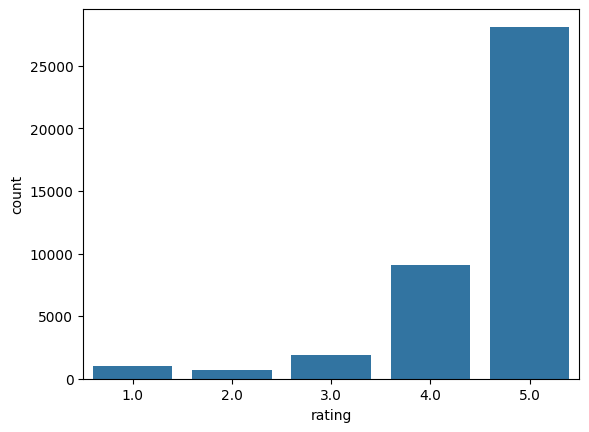

In [ ]:
# import and run all cells of the preprocessing file

import nbformat

from IPython.core.interactiveshell import InteractiveShell

with open('preprocessing.ipynb') as f:
    nb = nbformat.read(f, as_version=4)

shell = InteractiveShell.instance()
for cell in nb.cells:
    if cell.cell_type == 'code':
        shell.run_cell(cell.source)

## Embeddings

In [ ]:
from sentence_transformers import SentenceTransformer

#turn text into dimensional semantic embeddings for clustering
model = SentenceTransformer("all-MiniLM-L6-v2")

#transform each processed review into a embeddings vector 
emb = model.encode(csv_data["combined_text_processed"].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/1276 [00:00<?, ?it/s]

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

#checking 4 - 7 to find the best clustering formation
amount_of_clusters = range(4, 7)

# store metrics for evaluation
inertia = []
scores = []

# Find the best amount of clusters with the elbow method and silhouette score
for k in amount_of_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(emb)

#measures how tightly points are within clusters
    inertia.append(kmeans.inertia_)

#quantifies how well each point fits its own cluster versus others
    score = silhouette_score(emb, labels)

#append silhouette score to list
    scores.append(score)

# plot clustering metrics for visual output with Elbow method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(list(amount_of_clusters), inertia, marker='o')
plt.title("Elbow-Methode (Inertia)")
plt.xlabel("Anzahl Cluster (k)")
plt.ylabel("Inertia")

# plot clustering metrics for visual output with silhouette score
plt.subplot(1, 2, 2)
plt.plot(list(amount_of_clusters), scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Anzahl Cluster (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()    

KeyboardInterrupt: 

In [51]:
# Choosing 4 clusters over 5 provides a better balance between model simplicity and cluster quality.
# The silhouette score is higher with 4 clusters, indicating more distinct and well-separated groups,
# while adding a fifth cluster leads to more overlap and less meaningful segmentation.

k_final = 4

final_kmeans = KMeans(n_clusters=k_final, random_state=0)
csv_data["cluster"] = final_kmeans.fit_predict(emb)

In [ ]:
# inspect and profile clusters by category

#loop through each cluster
for i in range(k_final):
    print(f"\nCluster {i} – top categories:\n")
    # filters dataset rows belonging to the cluster and finds most frequent category within cluster
    print(csv_data[csv_data["cluster"] == i]["categories"].value_counts().head(5))


Cluster 0 – top categories:

categories
Fire Tablets,Tablets,Computers & Tablets,All Tablets,Electronics, Tech Toys, Movies, Music,Electronics,iPad & Tablets,Android Tablets,Frys                                    6360
Fire Tablets,Computers/Tablets & Networking,Electronics Features,Tablets,All Tablets,Amazon Tablets,Computers & Tablets,Electronics,iPad & Tablets,Tablets & eBook Readers    2215
Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers                                                912
Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets                                                                                                            784
Fire Tablets,Tablets,All Tablets,Amazon Tablets,Genuine Tablet Accessories,Computers & Tablets,Electronics,Amazon                                                              384
Name: count, dtype: int64

Cluster 1 – top categories:

categori

In [53]:
# Find good names for the clusters
mapper = {0: "Entertainment Tablets", 1: "E-Reader & Office Tablets", 2: "Health & household accessories", 3: "Smart Home & Amazon devices"}

# Add cluster name to csv
csv_data["cluster_name"] = csv_data["cluster"].apply(lambda x: mapper[x])

csv_data.head()

,name,asins,categories,imageURLs,rating,text,title,title_text,combined_text,categories_encoded,sentiment,title_text_processed,combined_text_processed,cluster,cluster_name
0,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,3.0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,... 3 of them and one of the item is bad quali...,... 3 of them and one of the item is bad quali...,1,1,... 3 one item bad quality missing backup spri...,... 3 one item bad quality missing backup spri...,3,Smart Home & Amazon devices
1,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,4.0,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,... always the less expensive way to go for pr...,... always the less expensive way to go for pr...,1,2,... always less expensive way go product like ...,... always less expensive way go product like ...,3,Smart Home & Amazon devices
2,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,5.0,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,... are not Duracell but for the price i am ha...,... are not Duracell but for the price i am ha...,1,2,... duracell price happy well duracell price h...,... duracell price happy well duracell price h...,3,Smart Home & Amazon devices
3,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,5.0,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,... as well as name brand batteries at a much ...,... as well as name brand batteries at a much ...,1,2,... well name brand battery much better seem w...,... well name brand battery much better seem w...,3,Smart Home & Amazon devices
4,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,5.0,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,... batteries are very long lasting the price ...,... batteries are very long lasting the price ...,1,2,... battery long lasting price great battery l...,... battery long lasting price great battery l...,3,Smart Home & Amazon devices


## Save the model

In [ ]:
import joblib

#serializes and saves the fitted KMeans model to disk
joblib.dump(final_kmeans, "../models/kmeans_model.pkl")

['../models/kmeans_model.pkl']

## Save relevant data to a new csv file

In [56]:
csv_data[["asins", "name", "rating", "title_text_processed", "imageURLs", "cluster_name"]].to_csv("../data/reviews.csv", index=False)

csv_data.head()

,name,asins,categories,imageURLs,rating,text,title,title_text,combined_text,categories_encoded,sentiment,title_text_processed,combined_text_processed,cluster,cluster_name
0,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,3.0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,... 3 of them and one of the item is bad quali...,... 3 of them and one of the item is bad quali...,1,1,... 3 one item bad quality missing backup spri...,... 3 one item bad quality missing backup spri...,3,Smart Home & Amazon devices
1,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,4.0,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,... always the less expensive way to go for pr...,... always the less expensive way to go for pr...,1,2,... always less expensive way go product like ...,... always less expensive way go product like ...,3,Smart Home & Amazon devices
2,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,5.0,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,... are not Duracell but for the price i am ha...,... are not Duracell but for the price i am ha...,1,2,... duracell price happy well duracell price h...,... duracell price happy well duracell price h...,3,Smart Home & Amazon devices
3,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,5.0,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,... as well as name brand batteries at a much ...,... as well as name brand batteries at a much ...,1,2,... well name brand battery much better seem w...,... well name brand battery much better seem w...,3,Smart Home & Amazon devices
4,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO","AA,AAA,Health,Electronics,Health & Household,C...",https://images-na.ssl-images-amazon.com/images...,5.0,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,... batteries are very long lasting the price ...,... batteries are very long lasting the price ...,1,2,... battery long lasting price great battery l...,... battery long lasting price great battery l...,3,Smart Home & Amazon devices
